# 📝 Project Overview¶
## 🎯 Task Description
- The goal of this project is to predict students' final exam scores based on various academic, behavioral, social, and demographic factors. This is a supervised regression task where the target variable is Exam_Score (a continuous numerical value).

### 1) Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Load the Dataset

In [7]:
df = pd.read_csv(r'C:\Projects\prediction\Student-Score-Prediction\data\StudentPerformanceFactors.csv')
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(6607, 20)

In [9]:
df.describe() # for numerical data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
df.describe(include=['O']) # for categorical data

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [11]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [12]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [13]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## Show Exam_Score Distribution

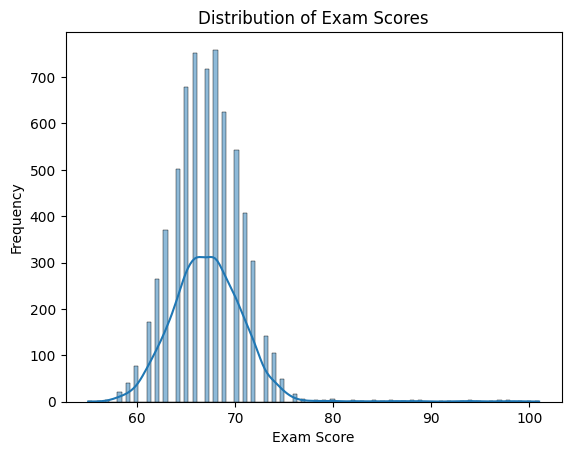

In [14]:
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')   
plt.ylabel('Frequency')
plt.show()


The distribution of exam scores shows a roughly normal shape centered around 68–70. Most students scored between 60 and 75, with only a small number of high-scoring outliers reaching above 90. The normality and moderate spread of scores indicate that linear modeling techniques (such as linear regression) are appropriate for predicting exam performance.

## Relationship Between Study Hours and Exam Score

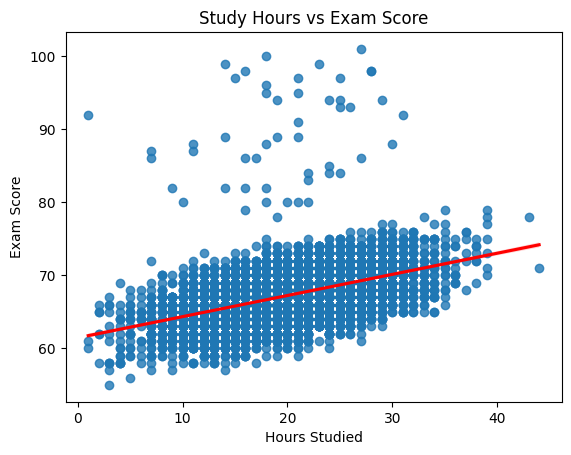

In [15]:
sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', line_kws={'color':'red'})
plt.title("Study Hours vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()


The scatter plot shows a positive relationship between study hours and exam scores. The regression line trends upward, indicating that students who study more hours generally achieve higher exam grades. However, the data points are moderately dispersed, suggesting that study hours alone do not fully determine performance. Additional factors such as motivation, previous knowledge, and access to educational support likely contribute to score variability. Therefore, while study hours have a positive effect on achievement, a multi-feature regression model is expected to produce more accurate predictions.

## Encoding
- ### Ordinal Encode features that have levels

In [16]:
scaled_3 = {'Low': 1, 'Medium': 2, 'High': 3}
df['Teacher_Quality'] = df['Teacher_Quality'].map(scaled_3)
df['Parental_Involvement'] = df['Parental_Involvement'].map(scaled_3)
df['Access_to_Resources'] = df['Access_to_Resources'].map(scaled_3)
df['Motivation_Level'] = df['Motivation_Level'].map(scaled_3)
df['Family_Income'] = df['Family_Income'].map(scaled_3)

In [17]:
df['Peer_Influence'] = df['Peer_Influence'].map({
    "Negative": 0.0,
    "Neutral": 0.5,
    "Positive": 1.0
})

df['Parental_Education_Level'] = df['Parental_Education_Level'].map({
    "High School": 0.0,
    "College": 0.5,
    "Postgraduate": 1.0
})

df['Distance_from_Home'] = df['Distance_from_Home'].map({
    "Far": 0.0,
    "Moderate": 0.5,
    "Near": 1.0
})


In [18]:
df = pd.get_dummies(df, columns=['Gender', 'School_Type', 'Internet_Access', 'Extracurricular_Activities','Learning_Disabilities'], drop_first=True)


In [19]:
df.head(10)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hours_Studied                   6607 non-null   int64  
 1   Attendance                      6607 non-null   int64  
 2   Parental_Involvement            6607 non-null   int64  
 3   Access_to_Resources             6607 non-null   int64  
 4   Sleep_Hours                     6607 non-null   int64  
 5   Previous_Scores                 6607 non-null   int64  
 6   Motivation_Level                6607 non-null   int64  
 7   Tutoring_Sessions               6607 non-null   int64  
 8   Family_Income                   6607 non-null   int64  
 9   Teacher_Quality                 6607 non-null   int64  
 10  Peer_Influence                  6607 non-null   float64
 11  Physical_Activity               6607 non-null   int64  
 12  Parental_Education_Level        66

In [20]:
df.duplicated().sum()

np.int64(0)

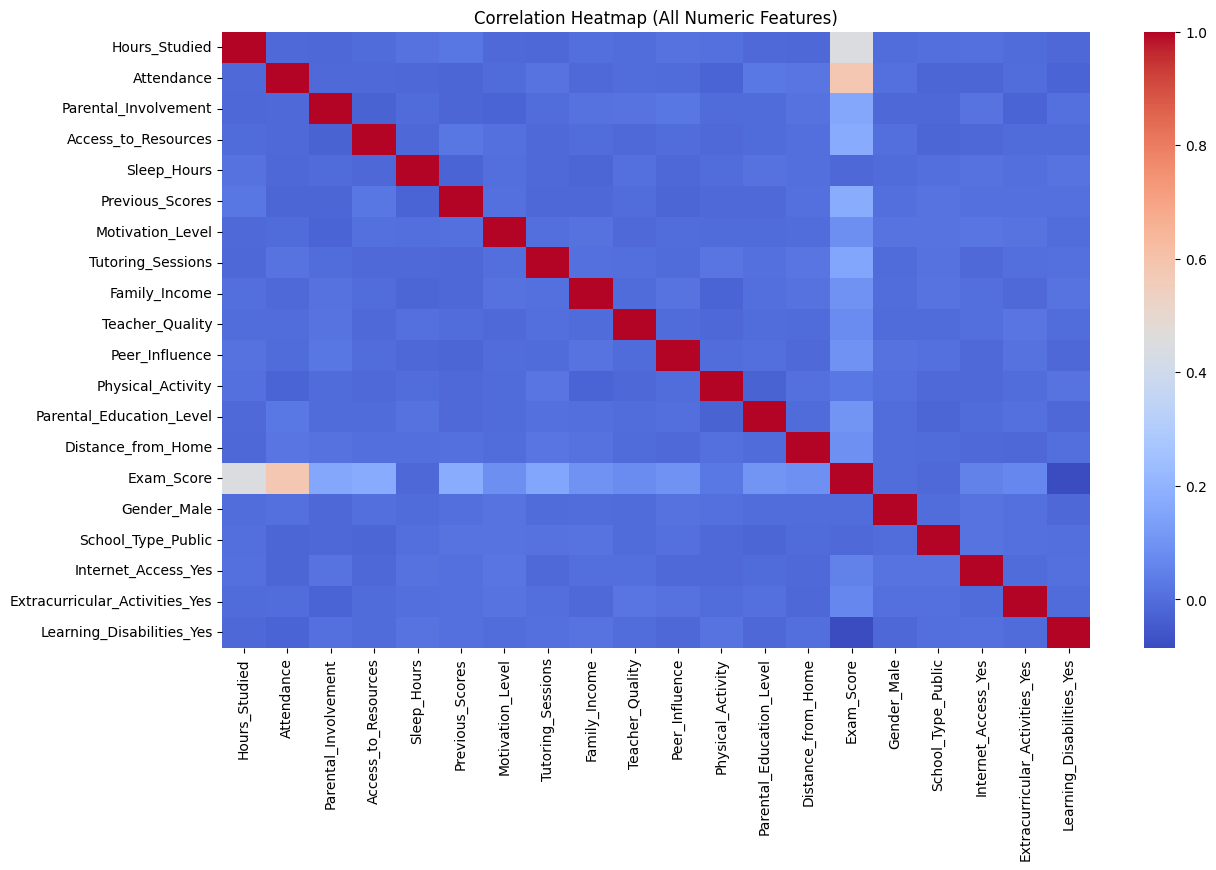

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (All Numeric Features)")
plt.show()

In [22]:
df.corr()['Exam_Score'].sort_values(ascending=False)


Exam_Score                        1.000000
Attendance                        0.581072
Hours_Studied                     0.445455
Previous_Scores                   0.175079
Access_to_Resources               0.169770
Parental_Involvement              0.157114
Tutoring_Sessions                 0.156525
Parental_Education_Level          0.103817
Peer_Influence                    0.100217
Family_Income                     0.094555
Distance_from_Home                0.088934
Motivation_Level                  0.086937
Teacher_Quality                   0.076684
Extracurricular_Activities_Yes    0.064382
Internet_Access_Yes               0.051475
Physical_Activity                 0.027824
Gender_Male                      -0.002032
School_Type_Public               -0.008844
Sleep_Hours                      -0.017022
Learning_Disabilities_Yes        -0.085066
Name: Exam_Score, dtype: float64

Exam performance is primarily academic-effort driven.
Students who attend regularly and study consistently show the highest performance. Supportive environments (tutoring, family, resources) help, but only moderately. Factors like gender, sleep hours, or school type show little to no impact, meaning performance is not determined by demographics but by habits and engagement.

## Modeling
### 1) Baseline Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
x =df[['Hours_Studied']]
y = df[['Exam_Score']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
baseline_model  = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)


In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Baseline Model - RMSE: {rmse:.2f}, R²: {r2:.2f}")

Baseline Model - RMSE: 3.29, R²: 0.23


only 23% of the differences in students’ exam performance are explained just by Hours_Studied.

- Interpretation (simple wording):Studying more helps, but it is not the only factor that determines exam performance.

- Interpretation (professional wording):Study hours alone provide a weak explanatory power over exam outcomes, indicating that additional academic, environmental, and personal factors contribute significantly to performance.

An average error of about 3.3 points means the prediction is not very precise.

### 2) Full Multi-Feature Regression Model

In [26]:
features = [
    'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
    'Access_to_Resources', 'Parental_Involvement', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality'
]


In [27]:
X = df[features]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

full_model = LinearRegression()
full_model.fit(X_train, y_train)

y_pred_full = full_model.predict(X_test)




In [28]:
rmse_full = np.sqrt(mean_squared_error(y_test, y_pred_full))
r2_full = r2_score(y_test, y_pred_full)

print("Full Model RMSE:", rmse_full)
print("Full Model R²:", r2_full)

Full Model RMSE: 1.8426345107487732
Full Model R²: 0.7597959298281289


76% of the variation in students’ exam scores.
This is a big jump from the baseline R² = 0.23.

- Interpretation (simple): Student performance is influenced by many factors — not just study hours. Once attendance, support, parental education, and motivation are included, the model becomes far more accurate.

- Interpretation (professional): The full model provides strong explanatory power, indicating that exam performance is multidimensional and depends on both academic engagement and environmental support factors.
On average, your predictions are within ~1.8 points of the real exam score.

This is much more accurate than the baseline RMSE of 3.29.

Meaning of rmse: If the model predicts a student will score 75, their actual score is likely between 73.2 and 76.8 — this is precise and useful.

## polynomial regression.

We only apply polynomial expansion to the most influential continuous features:
- Hours_Studied
- Attendance

These have the strongest correlation and are meaningful to curve-fit.

In [29]:
poly_features = ['Hours_Studied', 'Attendance']
X_poly_base = df[poly_features]
y = df['Exam_Score']


In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_poly_base)


## Fit the Polynomial Regression Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Model (Degree 2) RMSE:", rmse_poly)
print("Polynomial Model (Degree 2) R²:", r2_poly)


Polynomial Model (Degree 2) RMSE: 2.410842017026936
Polynomial Model (Degree 2) R²: 0.588812916089279


Adding non-linear terms to only Hours_Studied and Attendance captures some curvature in the learning relationship — but it does not capture the full complexity of real exam performance.

# Starting from here i want to increse the preformance

In [32]:
df = df.drop(columns=[
    'Gender_Male',
    'School_Type_Public',
    'Sleep_Hours',
    'Physical_Activity',
    'Internet_Access_Yes'
])


In [33]:
df['Study_Efficiency'] = df['Hours_Studied'] * df['Motivation_Level']
df['Instruction_Impact'] = df['Teacher_Quality'] * df['Attendance']
df['Support_Index'] = df['Parental_Involvement'] * df['Access_to_Resources']


In [34]:
features = [
    'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
    'Access_to_Resources', 'Parental_Involvement', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality',
    'Study_Efficiency', 'Instruction_Impact', 'Support_Index'
]

X = df[features]
y = df['Exam_Score']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("New RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("New R²:", r2_score(y_test, y_pred))


New RMSE: 1.8409777241076277
New R²: 0.7602276898741778


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("CV Mean R²:", scores.mean())
print("CV Std:", scores.std())


CV Mean R²: 0.7115769247283958
CV Std: 0.06216353797115315


## DEPOYMENT

In [36]:
from sklearn.pipeline import Pipeline
from joblib import dump
import json, os

# Make sure the folder exists
os.makedirs("artifacts", exist_ok=True)

# Wrap your final trained model
pipeline = Pipeline([
    ("reg", model)   # <--- use your final trained model variable
])

pipeline.fit(X_train, y_train)

# Save pipeline model
dump(pipeline, "artifacts/model.joblib")

# Save column order
with open("artifacts/columns.json", "w") as f:
    json.dump(features, f)

print("✅ model.joblib and columns.json successfully saved!")


✅ model.joblib and columns.json successfully saved!
